In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline


In [3]:
#loading dataset
Redwine = pd.read_csv("winequality-red.csv")
Redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Basic information about the dataset
Redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From the information peovided we can see that there are no missing values.
We'll then carry out a five number statistics to check where the average lies and if the data is skewed by validating the standard deviaton, 1st quartile, 3rd quartile(Q3), minimu maximum and the mean of the dataset.

In [5]:
#5 number statistics also known as Summary Statistics
Redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the above summary statistics, it canb be observed the skewedness of the data as there are more lower values than higher values.
We'll need to find the relationship between the column 'quality' and other columns by plotting a correlation graph

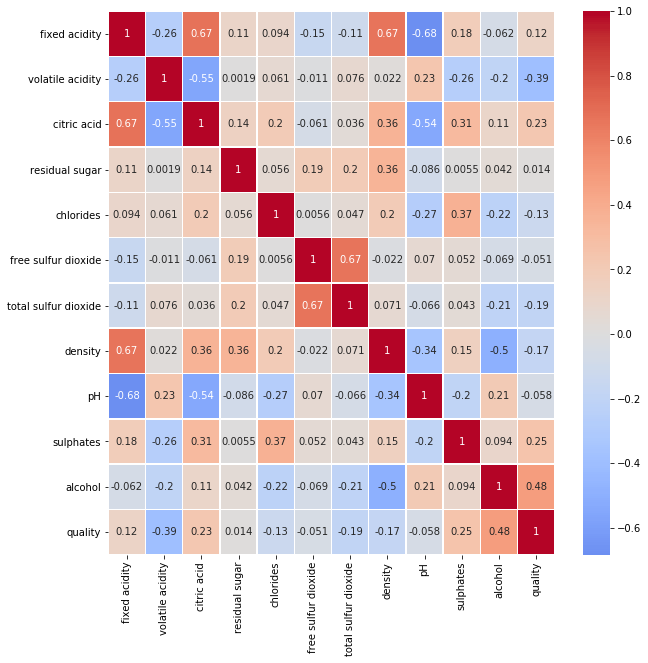

In [6]:
#Correlation
plt.figure(figsize=(10,10))
sns.heatmap(Redwine.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

<h2>According to heatmap, we can focus on alcohol-quality and pH-citric acid relations to get meaningful exploration</h2>



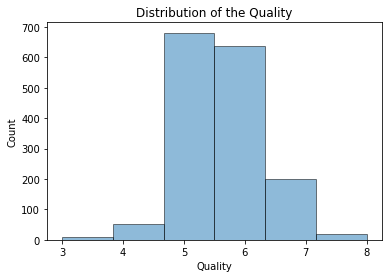

In [7]:
plt.hist(Redwine.quality,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of the Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

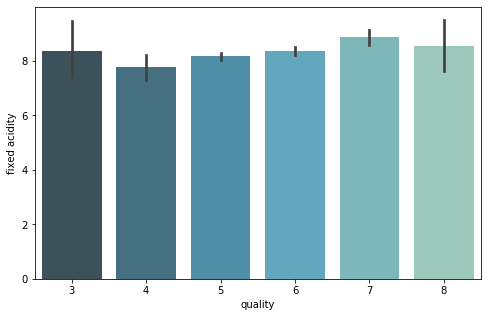

In [8]:
plt.figure(figsize=(8,5))
sns.barplot(Redwine['quality'],Redwine['fixed acidity'],palette="GnBu_d")
plt.show()

 As observed above we see that fixed acidity does not give any specification to classify the quality.


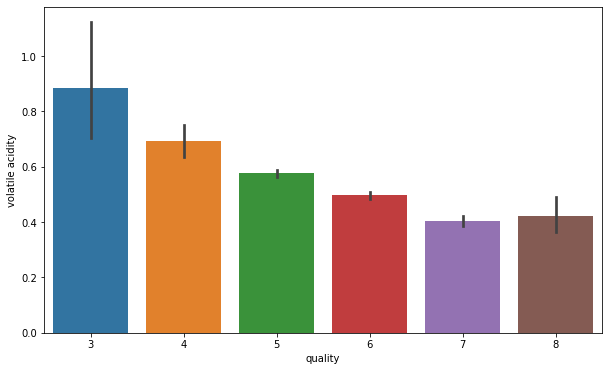

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = Redwine)


Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 


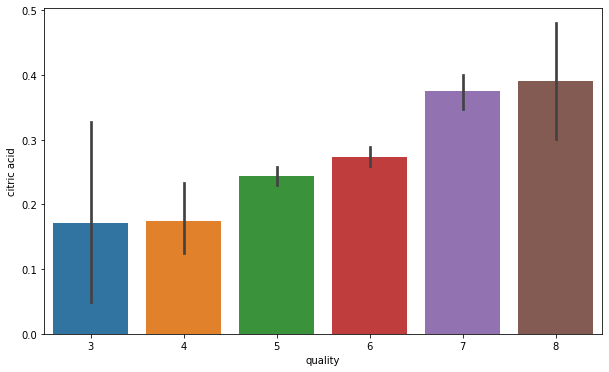

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = Redwine)

Composition of citric acid go higher as we go higher in the quality of the wine, a trend which shows that the higher the quality of the wine the higher the citric acid.


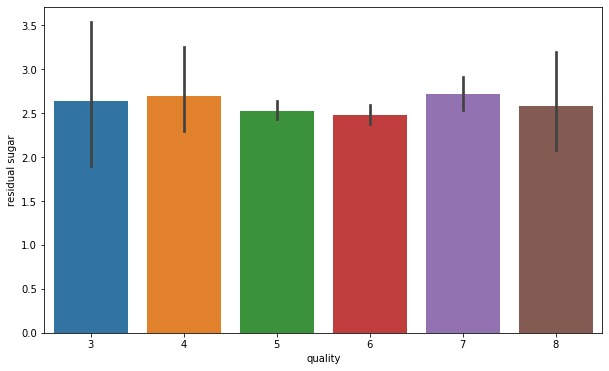

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = Redwine)

The above shows similar trend with fixed acidity

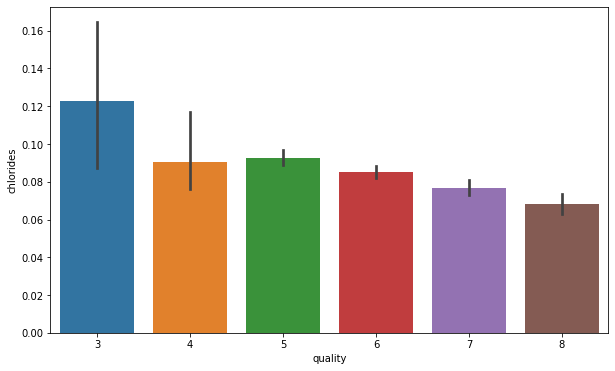

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = Redwine)


Chloride also shows a downward trend as we go higher in the quality of the wine


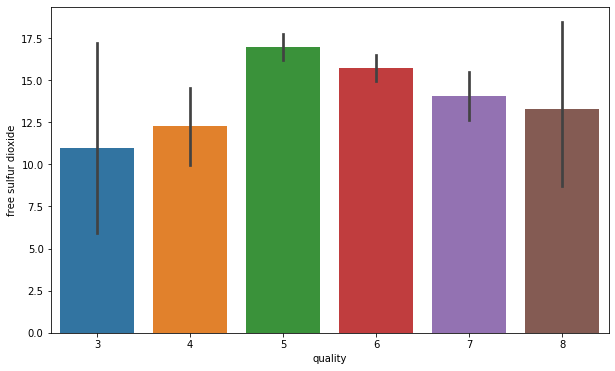

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = Redwine)

Not needed for our analysis

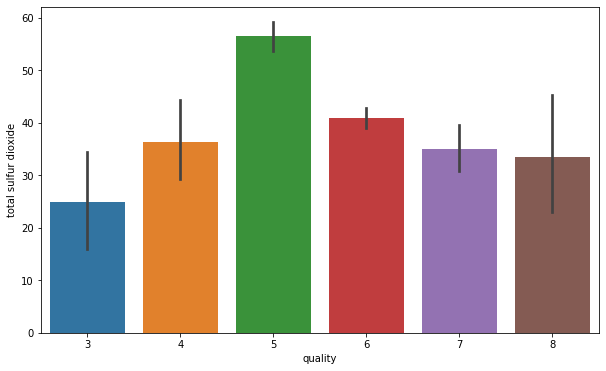

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = Redwine)


Same as former

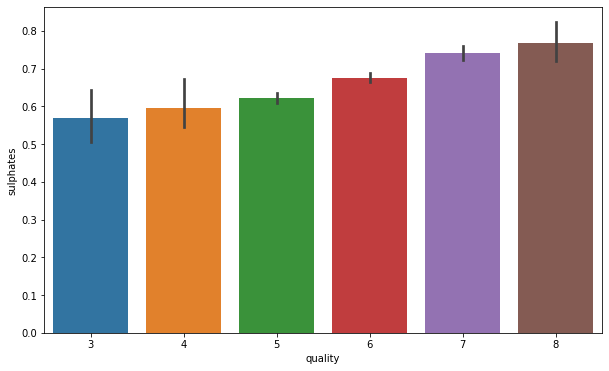

In [15]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = Redwine)


 Here we can see that Sulphates level goes higher with the quality of wine.

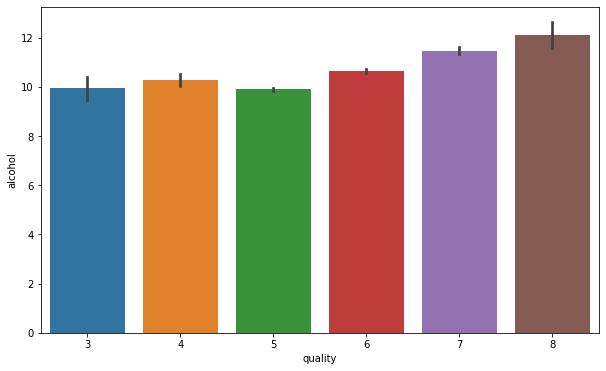

In [16]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = Redwine)

Alcohol level also goes higher as the quality of wine increases.


We can draw from this graphical distributions and representations that the physiochemical properties that increases the quality of red wine are;
1. Alcohol
2. Sulphates
3. Citric Acid

while those that show a decrease in composition as quality increases are;

1. Volatile Acidity 
and
2. Chlorides

<h1>Preprocessing Data for performing Machine learning algorithms</h1>
<p>We made a binary classificaion for the response variable, Divided our Redwine as good and bad by giving the limit for the quality</p>

In [17]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
Redwine['quality'] = pd.cut(Redwine['quality'], bins = bins, labels = group_names)

Now lets assign a labels to our quality variable

In [18]:
label_quality = LabelEncoder()

In [19]:
Redwine['quality'] = label_quality.fit_transform(Redwine['quality'])


Using fit.transform we assigned Bad to 0 and good to 1 


In [20]:
Redwine['quality'].value_counts()


0    1382
1     217
Name: quality, dtype: int64

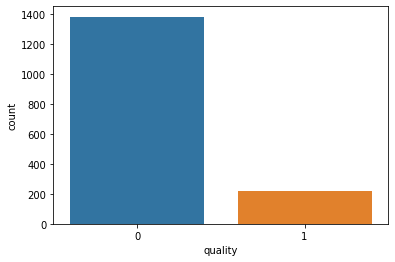

In [21]:
sns.countplot(Redwine['quality'])

In [22]:
X = Redwine.drop('quality', axis = 1)
y = Redwine['quality']


Now we seperate the dataset as response variable and feature variabes, response variables are also called dependent variables while feature variables are similar to independent variables. 

In [23]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [24]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int32

In [25]:
#spliting dataset using  train_test_split  method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

<p>After we have applied the standard scaler we then used StandardScaler.fit _transform(sc.fit_transform) to transform our X_train and X_test data reason being that we want our data to have a standard normal distribution that is we want to Standardize our data.

In [28]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [29]:
X_test

array([[-3.33991288e-01,  2.42581186e-01, -9.63136787e-01, ...,
        -4.42561113e-01,  6.34928030e-02, -7.55088351e-01],
       [-2.78643172e-01, -9.49230728e-02, -4.94583756e-01, ...,
         5.19964189e-01, -1.15964614e+00, -8.44713081e-01],
       [ 1.32645219e+00,  8.61338994e-01, -2.34276516e-01, ...,
        -1.85887699e-01,  2.23796204e+00, -4.86214161e-01],
       ...,
       [-1.90259149e-03,  4.67584025e-01, -7.80921719e-02, ...,
        -1.02007629e+00, -8.19885325e-01, -5.75838891e-01],
       [ 2.74837989e-01, -1.38868940e+00,  6.50768099e-01, ...,
        -1.02007629e+00,  2.67349294e-01,  6.78907330e-01],
       [ 4.40882337e-01,  1.39572074e+00, -1.17138258e+00, ...,
        -1.21719346e-01, -7.51933161e-01, -6.65463621e-01]])

<h1>Then we perform machine learning algorithm on the transformed data</h1>

In [30]:
#Random forest classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [31]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.69      0.43      0.53        47

    accuracy                           0.89       320
   macro avg       0.80      0.70      0.73       320
weighted avg       0.88      0.89      0.88       320



<p>Random forest classifier gave a precision of 88%, and an accuracy of 89% which means our model is doing very well, now we carried out a confusion matrix for the random forest classifier. A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.


In [32]:
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 27  20]]


The above shows that there are 266 TP which means True positive values, 7 False Negative(FN) values,20 True Negative(TN)   values and 27 False Positive(FP) values. below are brief explanations;
- Positive (P) : Observation is positive (for example: is an apple). 
- Negative (N) : Observation is not positive (for example: is not an apple). 
- True Positive (TP) : Observation is positive, and is predicted to be positive.
- False Negative (FN) : Observation is positive, but is predicted negative.
- True Negative (TN) : Observation is negative, and is predicted to be negative. 
- False Positive (FP) : Observation is negative, but is predicted positive.

<p>We then applied the Stochastic Gradient Descent Classifier algorithm which is often abbreviated SGD is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the computational burden, achieving faster iterations in trade for a lower convergence rate.


<h1>Stochastic Gradient Descent Classifier</h1>

In [33]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       273
           1       0.42      0.36      0.39        47

    accuracy                           0.83       320
   macro avg       0.66      0.64      0.65       320
weighted avg       0.82      0.83      0.83       320



84% accuracy using stochastic gradient descent classifier algorithm

In [34]:
print(confusion_matrix(y_test, pred_sgd))


[[250  23]
 [ 30  17]]


<p>We noticed a reduction in the TP and FP values and an increase in FN and TN. 
   We then used  the Support Vector Machine which In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. The Support Vector Machine (SVM) algorithm is a popular machine learning tool that offers solutions for both classification and regression problems.

<h1>Support Vector Classifier</h1>

In [35]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



Support vector classifier gets 86%

<p>Let's try to increase our accuracy of models
Grid Search CV 
Finding best parameters for our SVC model but first using random parameters we arrived at the following


In [36]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)


In [37]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [38]:
# We call for the Best parameters for our svc model
grid_svc.best_params_


{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

<p>Now we will run our SVC with the best parameters

In [39]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))
  

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



<p>We can see from the above that SVC improves from 86% to 90% using Grid search CV.
    We then carried out a cross validation for Random Forest and Standard Gradient Descent(SGD) and got the following result

In [40]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()


0.911675688976378

<p>As we can see that the Random forest accuracy increases from 87% to 91 % using cross validation score